In [29]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from xgboost import XGBRegressor, DMatrix
import xgboost as xgb
import matplotlib.pyplot as plt
import keras
import albumentations as A
import numpy as np
import glob
import cv2
import os
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.metrics import make_scorer
import math
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import statistics
from tqdm.notebook import tqdm
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

important_features = ['X','Y','tile','Height',
                     '2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_GRD', '2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0011_OPN_asc', '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0002_CLS', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_DIL_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0011_CLS_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0008_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0004_OPN', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0012_DIL_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0006_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0002_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0007_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0002_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0001_DIL', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0005_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0005_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_GRN_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0002_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0012_DIL_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0001_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0012_OPN', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0003_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0003_ERO_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCW_STM_B0012_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0005_DIL_asc', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0007_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0006_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0005_OPN_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDB_STM_B0007_DIL', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0004_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0013_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_CLS_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_GRN_STM_B0004_GRD', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_OPN_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0004_DIL', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0012_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW2_STM_B0002_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0009_DIL', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0002_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0006_CLS_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0013_OPN', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0003_DIL_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_TCW_STM_B0007_GRD', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0012_CLS_asc', '2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0011_GRD', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0004_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0012_CLS', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0008_GRD_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0012_GRD_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0001_CLS', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0003_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0003_BHT', '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0003_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0002_CLS', '2020-2020_001-365_HL_TSA_SEN2L_NDB_STM_B0011_CLS', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0009_ERO_asc', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_CLS_asc', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0007_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0013_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_ERO', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0001_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_OPN', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0001_CLS_asc', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0004_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0001_ERO', '2020-2020_001-365_HL_TSA_VVVHP_BVV_STM_B0007_OPN_asc', 
                     '2020-2020_001-365_HL_TSA_VVVHP_BVH_STM_B0007_GRD_asc', '2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0008_ERO']



important_features = ['X','Y','tile','Height',
                    '2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_GRD', '2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0002_CLS', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0008_OPN',
                     '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0004_OPN', '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0002_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0001_DIL', '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0005_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_GRN_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0012_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0003_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCW_STM_B0012_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0007_ERO', '2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0004_ERO',
                     '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0006_ERO', '2020-2020_001-365_HL_TSA_SEN2L_NDB_STM_B0007_DIL',
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0013_ERO',
                     '2020-2020_001-365_HL_TSA_SEN2L_GRN_STM_B0004_GRD', '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0004_DIL',
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0012_OPN', '2020-2020_001-365_HL_TSA_SEN2L_SW2_STM_B0002_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0009_DIL', '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0002_ERO',
                     '2020-2020_001-365_HL_TSA_SEN2L_NDW_STM_B0013_OPN', '2020-2020_001-365_HL_TSA_SEN2L_TCW_STM_B0007_GRD', 
                     '2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0011_GRD', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0012_CLS', 
                     '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0001_CLS', '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0003_OPN', 
                     '2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0003_BHT', '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0003_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0002_CLS', '2020-2020_001-365_HL_TSA_SEN2L_NDB_STM_B0011_CLS', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0007_ERO', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0013_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0004_ERO', '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_OPN', '2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0004_ERO', 
                     '2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0001_ERO',  '2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0008_ERO']



index = 'NDV,BNR,NDW,GRN,NIR,TCG,TCB,RE2,RE1,SW1,NDV,TCW,NDB,SW2'
morph = 'GRD,CLS,OPN,DIL,ERO,BHT'

filepath = 'C:/Users/egnke/PythonCode/Met_Eireann_git/Ireland_building_heights/Modelling/DataSetCreation/Pixel-Wise-Data/building_height_data.csv'
data = pd.read_csv(filepath)
print(data.shape)
data = data[important_features]
# filter out zeros and the tallest building in Ireland which is 50 metres taller
data = data[data.Height > 0]
data.head()

(1067270, 77)


,X,Y,tile,Height,2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_GRD,2020-2020_001-365_HL_TSA_SEN2L_NDV_STM_B0007_ERO,2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0002_CLS,2020-2020_001-365_HL_TSA_SEN2L_TCG_STM_B0008_OPN,2020-2020_001-365_HL_TSA_SEN2L_BNR_STM_B0004_OPN,2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0002_ERO,...,2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0002_CLS,2020-2020_001-365_HL_TSA_SEN2L_NDB_STM_B0011_CLS,2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0007_ERO,2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0013_ERO,2020-2020_001-365_HL_TSA_SEN2L_SW1_STM_B0004_ERO,2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_ERO,2020-2020_001-365_HL_TSA_SEN2L_RE1_STM_B0011_OPN,2020-2020_001-365_HL_TSA_SEN2L_TCB_STM_B0004_ERO,2020-2020_001-365_HL_TSA_SEN2L_NIR_STM_B0001_ERO,2020-2020_001-365_HL_TSA_SEN2L_RE2_STM_B0008_ERO
0,2135,2523,X0002_Y0002,2,4641,3704,2383,1066,1967,991,...,2087,2290,2022,-1790,1287,191,355,2326,1304,1652
1,2142,2546,X0002_Y0002,2,5813,3078,2362,625,1499,714,...,2051,1360,1524,-1798,1045,30,146,1976,1213,1511
2,2139,2524,X0002_Y0002,2,2330,5947,1699,1066,1967,982,...,1934,2123,1942,-1809,1274,191,472,2478,1296,1749
3,2161,2556,X0002_Y0002,2,3957,4461,1780,593,1766,820,...,1768,2538,1882,-1746,1363,118,166,2385,1064,1645
4,2139,2523,X0002_Y0002,2,2677,5947,2260,1086,1967,909,...,2076,2123,1896,-1809,1271,191,348,2478,1309,1760


In [30]:
def compute_class_weights(array, group_above_10m=True):
    
    if group_above_10m:
        array = np.where(array>10, 11, array)
        
    class_weights = class_weight.compute_class_weight('balanced',
                                                     np.unique(array),
                                                     array)

    class_weight_mapper = dict(zip(np.unique(array), class_weights))

    vectorized = np.vectorize(class_weight_mapper.get)(array)

    return vectorized


def weighted_root_mean_squared_error(y_actual, y_pred):
    weights = replace_value_with_frequency_of_occurance(y_actual)
    return np.sqrt(np.sum(weights * ((y_pred - y_actual) ** 2)) / np.sum(weights))


def root_mean_squared_error(y_actual, y_pred):
    MSE = np.square(np.subtract(y_actual,y_pred)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE

bins     = np.arange(1,41)
bins[-1] = data.Height.max()
data['binned'] = pd.cut(data['Height'], bins)
data['stratified_labels'] = LabelEncoder().fit_transform(data['binned'])


y = data['Height']
stratified = data['stratified_labels']
X = data.drop(['X','Y','tile','Height','binned','stratified_labels'], axis=1)

params = {'max_depth': 6,
         'n_estimators':100,
         'learning_rate': 0.1,
         'gamma':'0.15000000000000002',
         'colsample_bytree':'0.45',
         'objective':'count:poisson'
         }



poisson_xgb  = XGBRegressor(**params)
linear_model = Ridge(alpha=0.01)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=stratified, 
                                                    test_size=0.3)

In [4]:
class_weights = compute_class_weights(y_train)


xgb = XGBRegressor(**params)
xgb.fit(X_train, y_train, sample_weight=class_weights)


linear_model = Ridge(alpha=0.005, normalize = True)
linear_model.fit(X_train, y_train, 
                 sample_weight=class_weights, 
                 )


Ridge(alpha=0.005, normalize=True)

In [5]:
def weighted_root_mean_squared_error(y_actual, y_pred):
    weights = replace_value_with_frequency_of_occurance(y_actual)
    return np.sqrt(np.sum(weights * ((y_pred - y_actual) ** 2)) / np.sum(weights))

def replace_value_with_frequency_of_occurance(array):

    unique_elements, counts_elements = np.unique(array, return_counts=True)
    mapping = dict(zip(unique_elements, counts_elements))
    
    return np.vectorize(mapping.get)(array)

def root_mean_squared_error(y_actual, y_pred):
    MSE = np.square(np.subtract(y_actual,y_pred)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE


linear_model_preds = linear_model.predict(X_test)
xgb_model_preds    = xgb.predict(X_test)

linear_WRMSE = weighted_root_mean_squared_error(y_test, linear_model_preds)
linear_RMSE  = root_mean_squared_error(y_test, linear_model_preds)
print(f'Linear Model RMSE: {round(linear_RMSE, 2)}, WRMSE: {round(linear_WRMSE, 2)}')

xgb_WRMSE = weighted_root_mean_squared_error(y_test, xgb_model_preds)
xgb_RMSE  = root_mean_squared_error(y_test, xgb_model_preds)
print(f'XGBoost Model RMSE: {round(xgb_RMSE, 2)}, WRMSE: {round(xgb_WRMSE, 2)}')

Linear Model RMSE: 3.19, WRMSE: 2.05
XGBoost Model RMSE: 2.86, WRMSE: 1.87


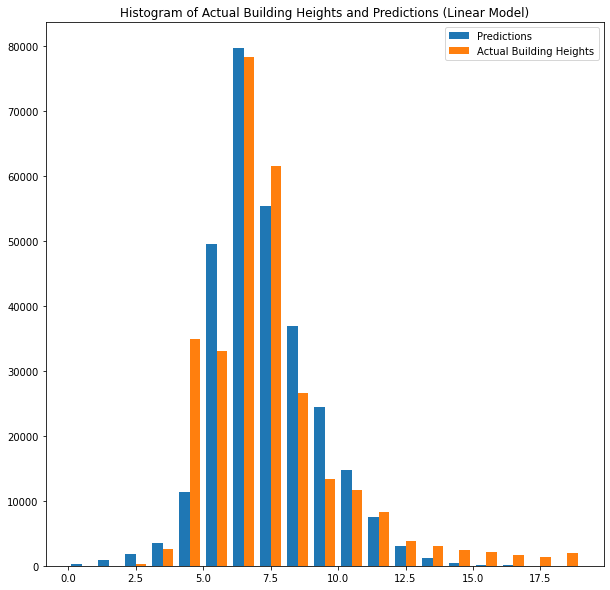

In [6]:
def plot_building_heights(preds, y_true, title):
    fig = plt.figure(figsize=(10, 10))
    plt.title(title)
    bins = np.arange(0,20)
    plt.hist([preds, y_true], bins, label=['Predictions', 'Actual Building Heights'])
    plt.legend(loc='upper right')
    
    
plot_building_heights(linear_model_preds, y_test, 'Histogram of Actual Building Heights and Predictions (Linear Model)')

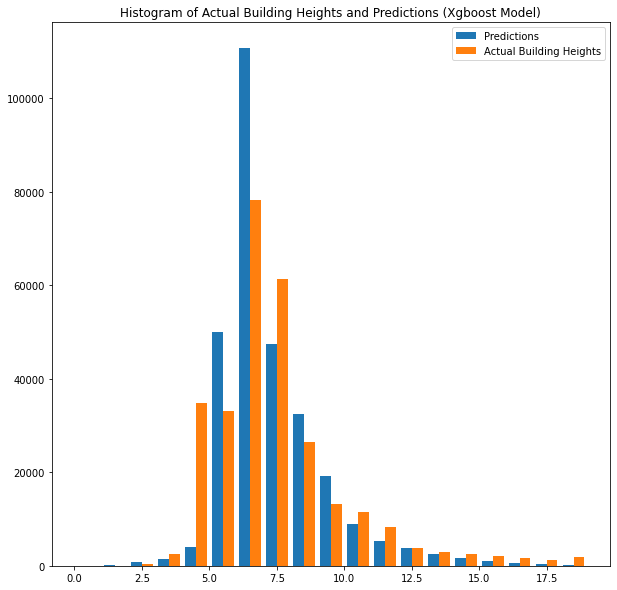

In [7]:
plot_building_heights(xgb_model_preds, y_test, 'Histogram of Actual Building Heights and Predictions (Xgboost Model)')

# Create Model

In [31]:
import pickle

def load_model(pkl_filename):

    with open(pkl_filename, 'rb') as file:
        pickle_model = pickle.load(file)
        
    return pickle_modelf


class_weights = compute_class_weights(y)

linear_model = Ridge(alpha=0.005, normalize = True)
linear_model.fit(X, y, 
                 sample_weight=class_weights, 
                 )


pkl_filename = "final_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(linear_model, file)

In [28]:
from osgeo import gdal
import pickle
import re


def load_model(pkl_filename):
    '''
    load model object from pickle file
    '''

    with open(pkl_filename, 'rb') as file:
        pickle_model = pickle.load(file)
        
    return pickle_modelf


def get_file_name(file_path):
    '''
    gets the folder name of the morhpology operater for example if 
    we are in the dilated folder -> DIL erosion -> ERO
    '''
    file_name = os.path.basename(file_path)
    clean_name = file_name.replace('.tif','')
    
    name_pieces = clean_name.split('_')

    if name_pieces[-1] == 'STM':
        return name_pieces[-2]

    elif name_pieces[-2] == 'TXT':
        return name_pieces[-1]

    else:
        return clean_name



def extract_band_names_values(file_path):
    '''
    given a tif file extract the band names
    and values
    '''

    gdal_obj = gdal.Open(file_path)
    num_bands = gdal_obj.RasterCount

    file_name = get_file_name(file_path)
    rasters = []
    names = []
    for band in range(1, num_bands+1):

        raster_band = gdal_obj.GetRasterBand(band)
        col_name = raster_band.GetDescription()
        raster_array = raster_band.ReadAsArray()

        rasters.append(raster_array)
        names.append(col_name+'_'+file_name)
        
    return rasters, names
   

def flatten_list_of_lists(array):
    return [item for sublist in array for item in sublist]


def loop_through_tile_folder(file_path):
    '''
    loops through every file in a tile folder X0001_Y0001
    and combines the raster bands from each morphology tif file 
    in the folder together and also documents the names of each band or feature.
    '''
    
    tile_rasters = []
    tile_feature_names = []
    for file_ in os.listdir(directory):
        
        if file_.endswith(".tif"):
            
            file_path = os.path.join(directory,file_)
            rasters, names = extract_band_names_values(file_path)
            
            tile_rasters.append(rasters)
            tile_feature_names.append(names)
    
    tile_rasters = flatten_list_of_lists(tile_rasters)
    tile_feature_names = flatten_list_of_lists(tile_feature_names)
    
    return np.array(tile_rasters), tile_feature_names



def make_segment_wide_prediction(img_volume, settlement_map, model, features, feature_order):
    '''
    loop through an image pixel by pixel and make predictions
    save these predictions in a numpy array
    '''
    width, height, channels = img_volume.shape
    predictions = np.zeros((width, height, 1))
    
    for point_X in range(width):
        for point_Y in range(height):
        
            # if building height map non zero than make a prediction
            if settlement_map[point_X,point_Y,0] > 0:
                
                pixel = img_volume[point_X,point_Y,:]
                pixel_data = pd.DataFrame(data=[pixel], columns=features)[feature_order]
                predictions[point_X, point_Y,0] = model.predict(pixel_data)
    
    
    return predictions



def loop_through_all_tiles_in_folder(folder_path_tiles, folder_path_settle, 
                                     output_folder, model, model_features):
    '''
    find coresspinding settlement map
    
    folder_path_tiles: path to the folder that stores all the tiles
                       for the morpholgy output.
                       
    folder_path_settle: path to the folder that stores all the tiles
                        for the settlement map.
    '''
    
    for folder in os.listdir(folder_path_tiles):
        
        tile = extract_what_tile(folder)
        settlement_tile, source = extract_settlement_tile(folder_path_settle, tile)
        tile_rasters, tile_feature_names = loop_through_tile_folder(folder)
        
        predictions = make_segment_wide_prediction(tile_rasters, 
                                                  settlement_tile, 
                                                  model, tile_feature_names, 
                                                  model_features)
        
        [cols, rows] = settlement_tile.shape
        
        filename = output_folder + tile + '.tif'
        save_predictions(filename, source, predictions, rows, cols)

        
        


    
def save_predictions(filename, source, predictions, rows, cols):
    """
    save the predcitions in the same projection 
    """

    driver = gdal.GetDriverByName("GTiff")
    driver.Register()
    outdata = driver.Create(filename, xsize=rows, ysize=cols, bands=1, eType=gdal.GDT_Int16)

    outdata.SetGeoTransform(source.GetGeoTransform())##sets same geotransform as input
    outdata.SetProjection(source.GetProjection())##sets same projection as input

    outdata.GetRasterBand(1).WriteArray(predictions)
    outdata.GetRasterBand(1).SetDescription('Building Heights')
    outdata.GetRasterBand(1).SetNoDataValue(-9999)##if you want these values transparent
    
    outdata.FlushCache() ##saves to disk!!
    
    outdata = None
    predictions   = None
    source  = None
        

        

def extract_settlement_tile(folder_path_settle, tile):
    
    '''
    given a tile eg. X0002_Y0003 find the corresponding
    settlement tile and return as array
    '''

    for folder in os.listdir(folder_path_settle):
        
        if tile in folder:
            
            for file_ in os.listdir(folder):
        
                if file_.endswith(".tif"):

                    file_path = os.path.join(folder, file_)
                    
    source = gdal.Open(file_path)
    raster_band = source.GetRasterBand(1)
    settle_img = raster_band.ReadAsArray()
    
    return settle_img, source
            
    

def extract_what_tile(file_path):
    '''
    given a file path this function will extract the tile name
    '''
    
    x = re.search(r'X\d{4}_Y\d{4}', file_path)
    
    if not None:
        return x[0]
    
    else:
        return 0

    
file_path = 'C:/Users/egnke/PythonCode/MetEireann/Sentienl-2-Data/Processed_Data/morphology/X0002_Y0002/TEXTURE_HL_TXT_BHT.tif'
extract_what_tile(file_path)

'X0002_Y0002'